In [76]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [77]:
import pandas as pd

In [78]:
data = np.loadtxt("OBD_sensors_new.csv",delimiter=",")

In [79]:
data.shape

(8865, 4)

In [80]:
type(data)

numpy.ndarray

In [81]:
x = data[:,0:3]
y = data[:,3]

# Spliting dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
print(x.shape)
print(y.shape)

(8865, 3)
(8865,)


In [82]:
print(x_train.shape)
print(x_test.shape)

(6205, 3)
(2660, 3)


In [83]:
count=0 
for i in y_train:
    if (i==0) :
        count=count+1
print("1 :",count)
count=0 
for i in y:
    if (i==1) :
        count=count+1
print("1 :",count)
count=0 
for i in y:
    if (i==2) :
        count=count+1
print("2 :",count)
count=0 
for i in y:
    if (i==3) :
        count=count+1
print("3 :",count)
count=0 
for i in y:
    if (i==4) :
        count=count+1
print("4 :",count)
count=0 
for i in y:
    if (i==5) :
        count=count+1
print("5 :",count)
count=0 
for i in y:
    if (i==6) :
        count=count+1
print("6 :",count)
count=0 
for i in y:
    if (i==7) :
        count=count+1
print("7 :",count)
count=0 
for i in y:
    if (i==8) :
        count=count+1
print("8 :",count)

1 : 3769
1 : 507
2 : 500
3 : 500
4 : 500
5 : 500
6 : 500
7 : 500
8 : 0


In [62]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 8)
y_test = to_categorical(y_test, 8)

In [63]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
print(y_train.shape)
print(y_test.shape)

(6205, 8)
(2660, 8)


# Creating the model

In [66]:
model = Sequential()
model.add(Dense(3,input_dim=3,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))
# model.add(Dense(1,activation='sigmoid'))

In [67]:
# model = Sequential()
# model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape(1)))
# model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(rate=0.25))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(rate=0.5))
# model.add(Dense(8, activation='softmax'))

# Compiling and Training the model 

In [68]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [45]:
learning_rate = 0.0001

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
epochs = 30
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/30
194/194 [==============================] - 0s 1ms/step - loss: 33.9271 - accuracy: 0.0952 - val_loss: 18.9141 - val_accuracy: 0.1102
Epoch 2/30
194/194 [==============================] - 0s 866us/step - loss: 23.0360 - accuracy: 0.1226 - val_loss: 11.2775 - val_accuracy: 0.0861
Epoch 3/30
194/194 [==============================] - 0s 933us/step - loss: 15.5340 - accuracy: 0.1486 - val_loss: 6.0121 - val_accuracy: 0.0861
Epoch 4/30
194/194 [==============================] - 0s 879us/step - loss: 10.7991 - accuracy: 0.2039 - val_loss: 2.8945 - val_accuracy: 0.1192
Epoch 5/30
194/194 [==============================] - 0s 979us/step - loss: 8.1009 - accuracy: 0.2590 - val_loss: 2.0293 - val_accuracy: 0.5974
Epoch 6/30
194/194 [==============================] - 0s 976us/step - loss: 6.6033 - accuracy: 0.3418 - val_loss: 2.0173 - val_accuracy: 0.5974
Epoch 7/30
194/194 [==============================] - 0s 953us/step - loss: 5.7227 - accuracy: 0.3705 - val_loss: 2.0051 - val_accur

# Plotting graphs for accuracy 

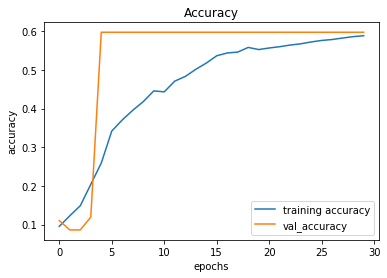

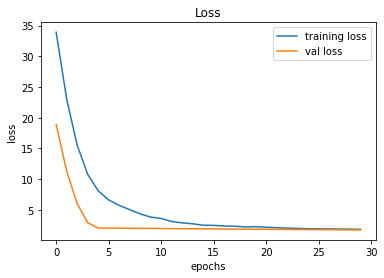

In [46]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [47]:
#model.save('model.h5')

In [48]:
#from keras.models import load_model

#model = load_model('model.h5')

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 3)                 12        
_________________________________________________________________
dropout_6 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 12)                48        
_________________________________________________________________
dropout_7 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 78        
_________________________________________________________________
dropout_8 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                

In [50]:
pred_train = model.predict_classes(x_train)
count = 0
for i in pred_train:
    if (i==0) :
        print(i)
        count = count+1
        
print(count)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [51]:
label=np.array(y_train)
print(label.shape)

(6205, 8)


In [37]:
from sklearn.metrics import accuracy_score

# prediction on training data
label = np.array(y_train)
pred_train = model.predict_classes(x_train)
print("Accuracy on training data = ",accuracy_score(label,pred_train)*100,"%")

# prediction on test data
label = np.array(y_test)
pred_test = model.predict_classes(x_test)
print("Accuracy on test data = ",accuracy_score(label,pred_test)*100,"%")
print(pred_test.reshape(1,2660))
print(label)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [38]:
for i in pred_test:
    if i != 0 :
        print(i)

NameError: name 'pred_test' is not defined

In [77]:
#model.save('anomaly_model.h5')

# Loading the model

In [78]:
#from keras.models import load_model

In [79]:
#model = load_model('anomaly_model.h5')

In [52]:
# Trying with real world input
samples = np.array([[data[28][0:3]]])      #([  [   ],[   ]  ])
samples

array([[[85.        ,  2.8900001 , 15.68627453]]])

In [53]:
prediction = model.predict_classes(samples)
prediction

array([[0]], dtype=int64)

In [54]:
pred = model.predict(samples)
pred

array([[[0.25355422, 0.10329545, 0.10350376, 0.10346963, 0.10187196,
         0.1145069 , 0.11407425, 0.10572381]]], dtype=float32)